# **Seatwork 11.1 Exploratory Data Analysis for Machine Learning**
**Name:** John Rome A. Belocora          
**Section:** CPE22S3   
**Date:** 04/26/2024  
**Teacher:** Engr. Roman Richard


In [1]:
pip install ucimlrepo

In [2]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.1 MB/s eta 0:00:00


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
A = automobile.data.features
B = automobile.data.targets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

# **Linear Regression Analysis**

# **Data Wrangling**

In [5]:
#Concatenating
amdata = pd.concat([A, B])
amdata

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27.0,21.0,5000.0,111.0,9.0,2.68,3.47,mpfi,130.0,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,NaN
1,16500.0,27.0,21.0,5000.0,111.0,9.0,2.68,3.47,mpfi,130.0,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,NaN
2,16500.0,26.0,19.0,5000.0,154.0,9.0,3.47,2.68,mpfi,152.0,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,NaN
3,13950.0,30.0,24.0,5500.0,102.0,10.0,3.40,3.19,mpfi,109.0,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,NaN
4,17450.0,22.0,18.0,5500.0,115.0,8.0,3.40,3.19,mpfi,136.0,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [6]:
#Identifying missing values in each column
amdata.isnull().sum()

price                209
highway-mpg          205
city-mpg             205
peak-rpm             207
horsepower           207
compression-ratio    205
stroke               209
bore                 209
fuel-system          205
engine-size          205
num-of-cylinders     205
engine-type          205
curb-weight          205
height               205
width                205
length               205
wheel-base           205
engine-location      205
drive-wheels         205
body-style           205
num-of-doors         207
aspiration           205
fuel-type            205
make                 205
normalized-losses    246
symboling            205
dtype: int64

In [7]:
#Identifying datatypes in each column
amdata.dtypes

price                float64
highway-mpg          float64
city-mpg             float64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size          float64
num-of-cylinders     float64
engine-type           object
curb-weight          float64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling            float64
dtype: object

In [8]:
# We can notice here that the 209 values in the column price has missing values
amdata.price.isnull().value_counts()

price
True     209
False    201
Name: count, dtype: int64

# **To do Linear Regression we have to remove object data types in order to predict the value of a variable based on the value of another variable**

In [9]:
#Creating new dataframe
new_df = amdata.copy()
new_df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27.0,21.0,5000.0,111.0,9.0,2.68,3.47,mpfi,130.0,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,NaN
1,16500.0,27.0,21.0,5000.0,111.0,9.0,2.68,3.47,mpfi,130.0,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,NaN
2,16500.0,26.0,19.0,5000.0,154.0,9.0,3.47,2.68,mpfi,152.0,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,NaN
3,13950.0,30.0,24.0,5500.0,102.0,10.0,3.40,3.19,mpfi,109.0,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,NaN
4,17450.0,22.0,18.0,5500.0,115.0,8.0,3.40,3.19,mpfi,136.0,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [10]:
#Dropping object datatypes and fill missing values with mean
def Doafmv(data):
    for column in data.columns:
        #Identifying the column if it is a object datatype
        if data[column].dtype == 'object':
            #If the column is a object, the column will get dropped
            data = data.drop(column, axis=1)
        else:
            #If the column is not a object datatype, it will get the mean
            column_mean = data[column].mean()
            #Filling missing values with the collected mean value
            data[column] = data[column].fillna(column_mean)
    return data

In [11]:
#Output of the new datatypes result
new_df = Doafmv(new_df)
new_df.dtypes

price                float64
highway-mpg          float64
city-mpg             float64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
engine-size          float64
num-of-cylinders     float64
curb-weight          float64
height               float64
width                float64
length               float64
wheel-base           float64
num-of-doors         float64
normalized-losses    float64
symboling            float64
dtype: object

In [12]:
#Output of the new results of number of missing values
new_df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
engine-size          0
num-of-cylinders     0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
num-of-doors         0
normalized-losses    0
symboling            0
dtype: int64

# **Correlation**

In [13]:
# Dataframe correlation
new_df.corr()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
price,1.000000e+00,-6.905257e-01,-0.667449,-1.008541e-01,7.579170e-01,7.099036e-02,8.209530e-02,5.323000e-01,8.617522e-01,6.877698e-01,0.820825,1.343875e-01,7.286988e-01,0.682986,5.831681e-01,4.600081e-02,1.339987e-01,6.412808e-18
highway-mpg,-6.905257e-01,1.000000e+00,0.971337,-5.425672e-02,-7.709027e-01,2.652014e-01,-4.396069e-02,-5.869915e-01,-6.774699e-01,-4.666659e-01,-0.797465,-1.073576e-01,-6.772179e-01,-0.704662,-5.440819e-01,-4.421287e-02,-1.782209e-01,-1.431166e-17
city-mpg,-6.674493e-01,9.713370e-01,1.000000,-1.137229e-01,-8.031621e-01,3.247014e-01,-4.217899e-02,-5.845084e-01,-6.536579e-01,-4.458372e-01,-0.757414,-4.863963e-02,-6.427043e-01,-0.670909,-4.704136e-01,-2.067106e-02,-2.187488e-01,0.000000e+00
peak-rpm,-1.008541e-01,-5.425672e-02,-0.113723,1.000000e+00,1.309708e-01,-4.359359e-01,-6.684439e-02,-2.547613e-01,-2.445994e-01,-1.243575e-01,-0.266283,-3.206018e-01,-2.198592e-01,-0.287031,-3.607037e-01,-2.402947e-01,2.377476e-01,-1.057927e-16
horsepower,7.579170e-01,-7.709027e-01,-0.803162,1.309708e-01,1.000000e+00,-2.057397e-01,8.826363e-02,5.757374e-01,8.107125e-01,6.912082e-01,0.750968,-1.101370e-01,6.421954e-01,0.554434,3.519573e-01,-1.240007e-01,2.034339e-01,2.992664e-17
compression-ratio,7.099036e-02,2.652014e-01,0.324701,-4.359359e-01,-2.057397e-01,1.000000e+00,1.861052e-01,5.200705e-03,2.897136e-02,-2.000185e-02,0.151362,2.612142e-01,1.811286e-01,0.158414,2.497858e-01,1.615024e-01,-1.145246e-01,2.481255e-17
stroke,8.209530e-02,-4.396069e-02,-0.042179,-6.684439e-02,8.826363e-02,1.861052e-01,1.000000e+00,-5.590896e-02,2.030940e-01,8.151293e-03,0.168783,-5.535131e-02,1.829391e-01,0.129522,1.609439e-01,-1.064434e-02,5.492889e-02,-7.856934e-17
bore,5.323000e-01,-5.869915e-01,-0.584508,-2.547613e-01,5.757374e-01,5.200705e-03,-5.590896e-02,1.000000e+00,5.837979e-01,2.314387e-01,0.648485,1.711013e-01,5.591517e-01,0.606462,4.887602e-01,1.127616e-01,-2.926566e-02,-4.548585e-17
engine-size,8.617522e-01,-6.774699e-01,-0.653658,-2.445994e-01,8.107125e-01,2.897136e-02,2.030940e-01,5.837979e-01,1.000000e+00,8.460307e-01,0.850594,6.714874e-02,7.354334e-01,0.683360,5.693287e-01,1.749786e-02,1.109969e-01,-3.786746e-17
num-of-cylinders,6.877698e-01,-4.666659e-01,-0.445837,-1.243575e-01,6.912082e-01,-2.000185e-02,8.151293e-03,2.314387e-01,8.460307e-01,1.000000e+00,0.609727,-1.399542e-02,5.450075e-01,0.430672,3.395073e-01,-1.651976e-02,1.080814e-01,6.838791e-17


# **Heatmap Correlation**

<Axes: >

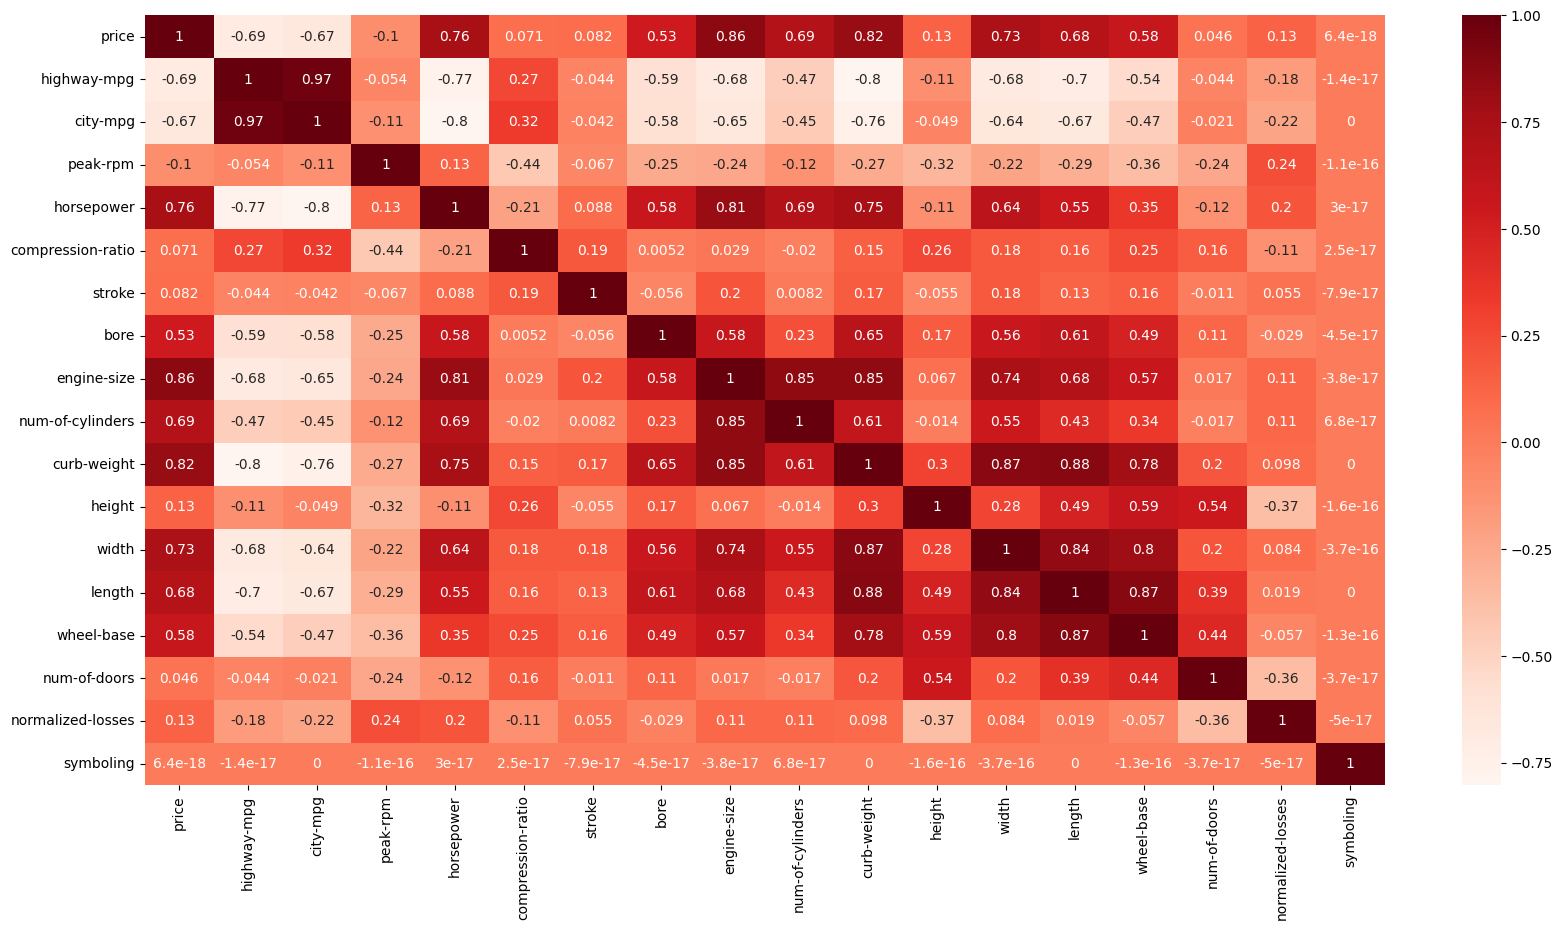

In [14]:
# Heatmap correlation of the Dataframe
plt.figure(figsize=[20,10])
sns.heatmap(new_df.corr(), annot=True,cmap='Reds')

# **Train a Linear Regression Model**

In [15]:
#Using the highway-mpg and city-mpg as a Train test
highway = new_df['highway-mpg']
city = new_df['city-mpg']

In [16]:
highway.shape

(410,)

# **Train Test Split**

In [17]:
#Train Test Split
highway_train, highway_test, city_train, city_test = train_test_split(highway, city, test_size=0.3, random_state = 100)

In [18]:
highway_train.shape

(287,)

In [19]:
highway_test.shape

(123,)

In [20]:
city_train.shape

(287,)

In [21]:
city_test.shape

(123,)

# **Linear Regression**

In [22]:
model = LinearRegression()

In [23]:
#Reshaping the 1D array into a 2D array for model.fit standards
city_train_reshaped = np.reshape(city_train, (-1, 1))
highway_train_reshaped = np.reshape(highway_train, (-1, 1))

city_test_reshaped = np.reshape(city_test, (-1, 1))
highway_test_reshaped = np.reshape(highway_test, (-1, 1))

In [24]:
model.fit(highway_train_reshaped, city_train_reshaped)

LinearRegression()

# **Model Coefficient**

In [25]:
model.coef_

array([[0.90745472]])

# **Predictions from our Model**

In [26]:
highway_pred = model.predict(highway_test_reshaped)
highway_pred

array([[31.78376767],
       [25.20582758],
       [30.87631295],
       [23.61667516],
       [21.80176571],
       [19.98685626],
       [25.20582758],
       [25.20582758],
       [25.20582758],
       [24.52412988],
       [28.15394878],
       [30.87631295],
       [25.20582758],
       [25.20582758],
       [24.52412988],
       [25.20582758],
       [25.20582758],
       [18.17194681],
       [25.20582758],
       [25.20582758],
       [25.20582758],
       [26.33903933],
       [25.20582758],
       [19.98685626],
       [25.20582758],
       [31.78376767],
       [25.20582758],
       [22.70922043],
       [25.20582758],
       [25.20582758],
       [25.20582758],
       [25.20582758],
       [18.17194681],
       [31.78376767],
       [25.20582758],
       [45.39558854],
       [25.20582758],
       [25.20582758],
       [25.20582758],
       [39.95086019],
       [19.98685626],
       [25.20582758],
       [25.20582758],
       [19.07940154],
       [25.20582758],
       [25

In [27]:
city_pred = model.predict(city_test_reshaped)
city_pred

array([[25.4315846 ],
       [20.18605364],
       [25.4315846 ],
       [19.07940154],
       [14.54212792],
       [14.54212792],
       [20.18605364],
       [20.18605364],
       [20.18605364],
       [19.07940154],
       [23.61667516],
       [25.4315846 ],
       [20.18605364],
       [20.18605364],
       [19.07940154],
       [20.18605364],
       [20.18605364],
       [12.72721847],
       [20.18605364],
       [20.18605364],
       [20.18605364],
       [20.89431098],
       [20.18605364],
       [14.54212792],
       [20.18605364],
       [25.4315846 ],
       [20.18605364],
       [16.35703736],
       [20.18605364],
       [20.18605364],
       [20.18605364],
       [20.18605364],
       [18.17194681],
       [25.4315846 ],
       [20.18605364],
       [39.95086019],
       [20.18605364],
       [20.18605364],
       [20.18605364],
       [31.78376767],
       [14.54212792],
       [20.18605364],
       [20.18605364],
       [14.54212792],
       [20.18605364],
       [20

# **Regression Evaluation Metrics**

In [28]:
MAE = metrics.mean_absolute_error(highway_test_reshaped, highway_pred)
MSE = metrics.mean_squared_error(highway_test_reshaped, highway_pred)
RMSE= np.sqrt(MSE)

In [29]:
#Mean Absolute Error
MAE

5.589537666261423

In [30]:
#Mean Squared Error
MSE

31.479419933629654

In [31]:
#Root Mean Squared Error
RMSE

5.610652362571544

In [32]:
new_df['highway-mpg'].mean()

30.75121951219512

# **Residual Histograms**

In [33]:
#Declaration of test residual variables
test_residual_highway = highway_test_reshaped - highway_pred
test_residual_city = city_test_reshaped - city_pred

**Using Residual Histograms to check whether the variance is normally distributed**

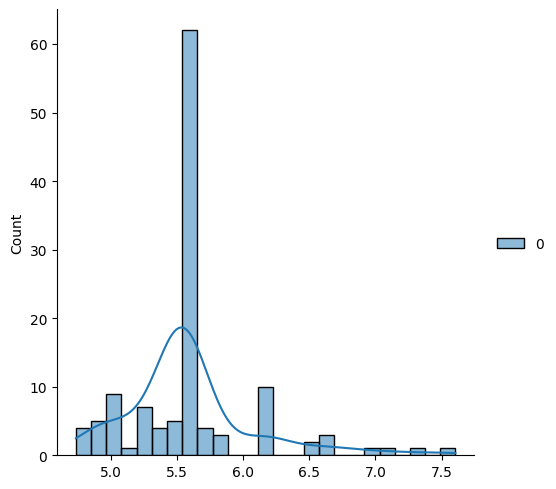

In [34]:
sns.displot(test_residual_highway, bins=25, kde=True)

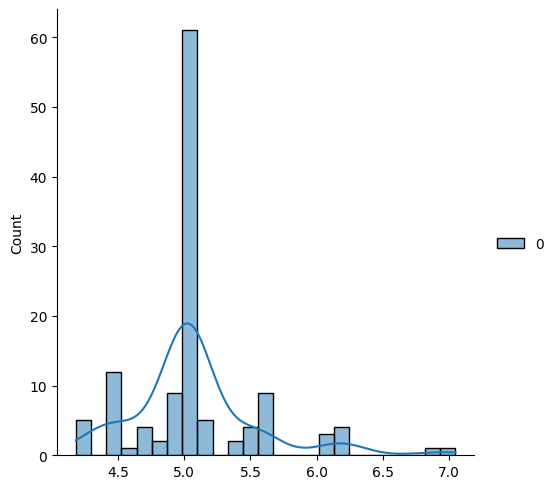

In [35]:
sns.displot(test_residual_city, bins=25, kde=True)

# **Logistic Regression Analysis**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
import warnings

warnings.filterwarnings('ignore')

In [136]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [137]:
wine_data = pd.concat([X, y])
wine_data

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,NaN
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,NaN
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


# **Exploratory Data Analysis**

In [40]:
wine_data.shape

(356, 14)

In [41]:
wine_data.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [42]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  class     

In [152]:
new_df2 = wine_data.copy()
new_df2

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,NaN
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,NaN
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,NaN
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [153]:
new_df2 = Doafmv(new_df2)
new_df2

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.06000,0.280000,2.290000,5.64000,1.040000,3.920000,1065.000000,1.938202
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.76000,0.260000,1.280000,4.38000,1.050000,3.400000,1050.000000,1.938202
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.24000,0.300000,2.810000,5.68000,1.030000,3.170000,1185.000000,1.938202
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.49000,0.240000,2.180000,7.80000,0.860000,3.450000,1480.000000,1.938202
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.69000,0.390000,1.820000,4.32000,1.040000,2.930000,735.000000,1.938202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000
174,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000
175,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000
176,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000


In [154]:
new_df2.rename(columns={'Flavanoids':'Flavonoids', 'Nonflavanoid_phenols':'Nonflavonoid_phenols'}, inplace=True)
new_df2

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.230000,1.710000,2.430000,15.600000,127.000000,2.800000,3.06000,0.280000,2.290000,5.64000,1.040000,3.920000,1065.000000,1.938202
1,13.200000,1.780000,2.140000,11.200000,100.000000,2.650000,2.76000,0.260000,1.280000,4.38000,1.050000,3.400000,1050.000000,1.938202
2,13.160000,2.360000,2.670000,18.600000,101.000000,2.800000,3.24000,0.300000,2.810000,5.68000,1.030000,3.170000,1185.000000,1.938202
3,14.370000,1.950000,2.500000,16.800000,113.000000,3.850000,3.49000,0.240000,2.180000,7.80000,0.860000,3.450000,1480.000000,1.938202
4,13.240000,2.590000,2.870000,21.000000,118.000000,2.800000,2.69000,0.390000,1.820000,4.32000,1.040000,2.930000,735.000000,1.938202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000
174,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000
175,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000
176,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.02927,0.361854,1.590899,5.05809,0.957449,2.611685,746.893258,3.000000


# **Identifying Outliers**

**Outliers in Numerical Variables**

In [46]:
print(round(new_df2.describe()),2)

       Alcohol  Malicacid    Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
count    356.0      356.0  356.0              356.0      356.0          356.0   
mean      13.0        2.0    2.0               19.0      100.0            2.0   
std        1.0        1.0    0.0                2.0       10.0            0.0   
min       11.0        1.0    1.0               11.0       70.0            1.0   
25%       13.0        2.0    2.0               19.0       98.0            2.0   
50%       13.0        2.0    2.0               19.0      100.0            2.0   
75%       13.0        2.0    2.0               20.0      100.0            2.0   
max       15.0        6.0    3.0               30.0      162.0            4.0   

       Flavonoids  Nonflavonoid_phenols  Proanthocyanins  Color_intensity  \
count       356.0                 356.0            356.0            356.0   
mean          2.0                   0.0              2.0              5.0   
std           1.0                   0.0

**Regarding in the results above, we can notice that Alcohol, Alcalinity_of_ash, Magnesium, and Proline columns may contain outliers**

**Using boxplots to visualize outliers**

Text(0, 0.5, 'Proline')

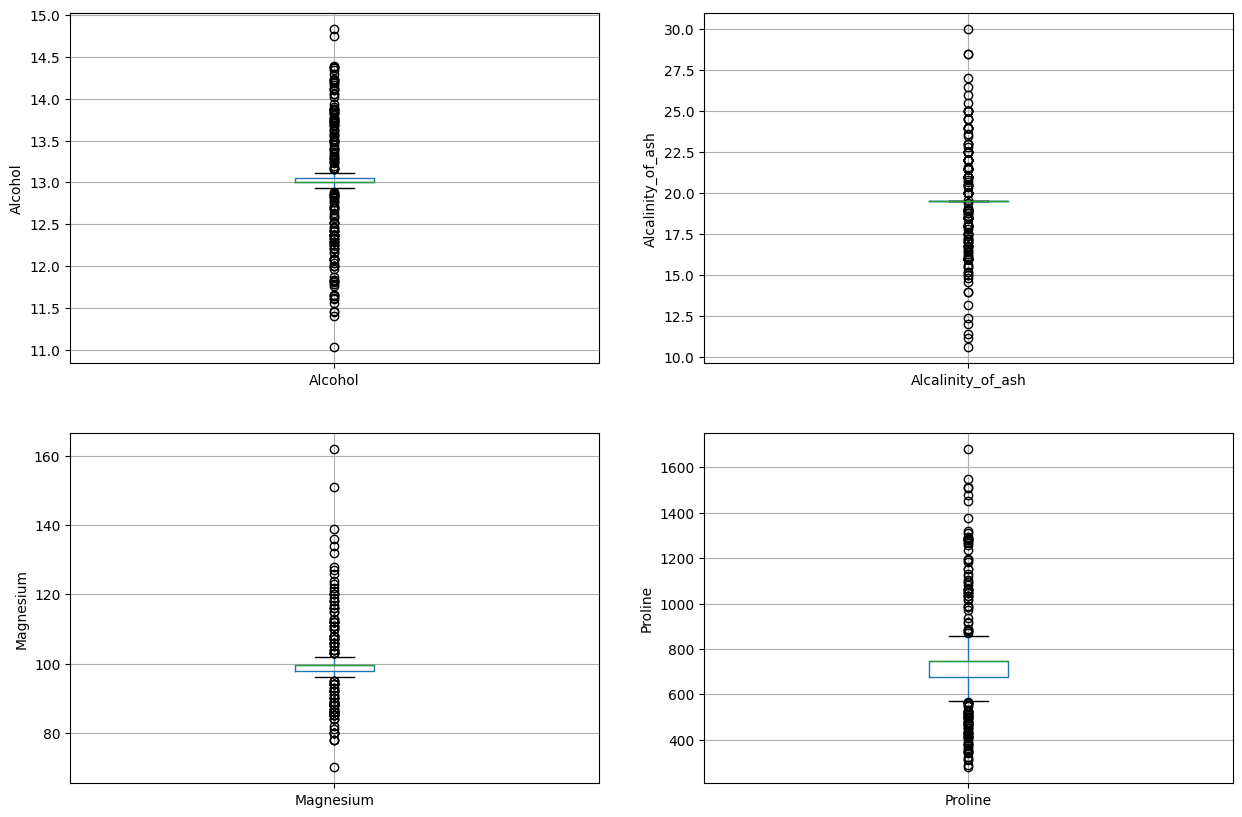

In [47]:
#Creating 4 subplots for the box plots of the 4 columns
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = new_df2.boxplot(column='Alcohol')
fig.set_title('')
fig.set_ylabel('Alcohol')

plt.subplot(2, 2, 2)
fig = new_df2.boxplot(column='Alcalinity_of_ash')
fig.set_title('')
fig.set_ylabel('Alcalinity_of_ash')

plt.subplot(2, 2, 3)
fig = new_df2.boxplot(column='Magnesium')
fig.set_title('')
fig.set_ylabel('Magnesium')

plt.subplot(2, 2, 4)
fig = new_df2.boxplot(column='Proline')
fig.set_title('')
fig.set_ylabel('Proline')

As seen in the result we can say that the boxplots confirm that there are a lot of outliers in the 4 given columns

# **Checking the Distribution of variables**
**Using histograms we can check if the distributions are normal or skewed**

Text(0.5, 0, 'Proline')

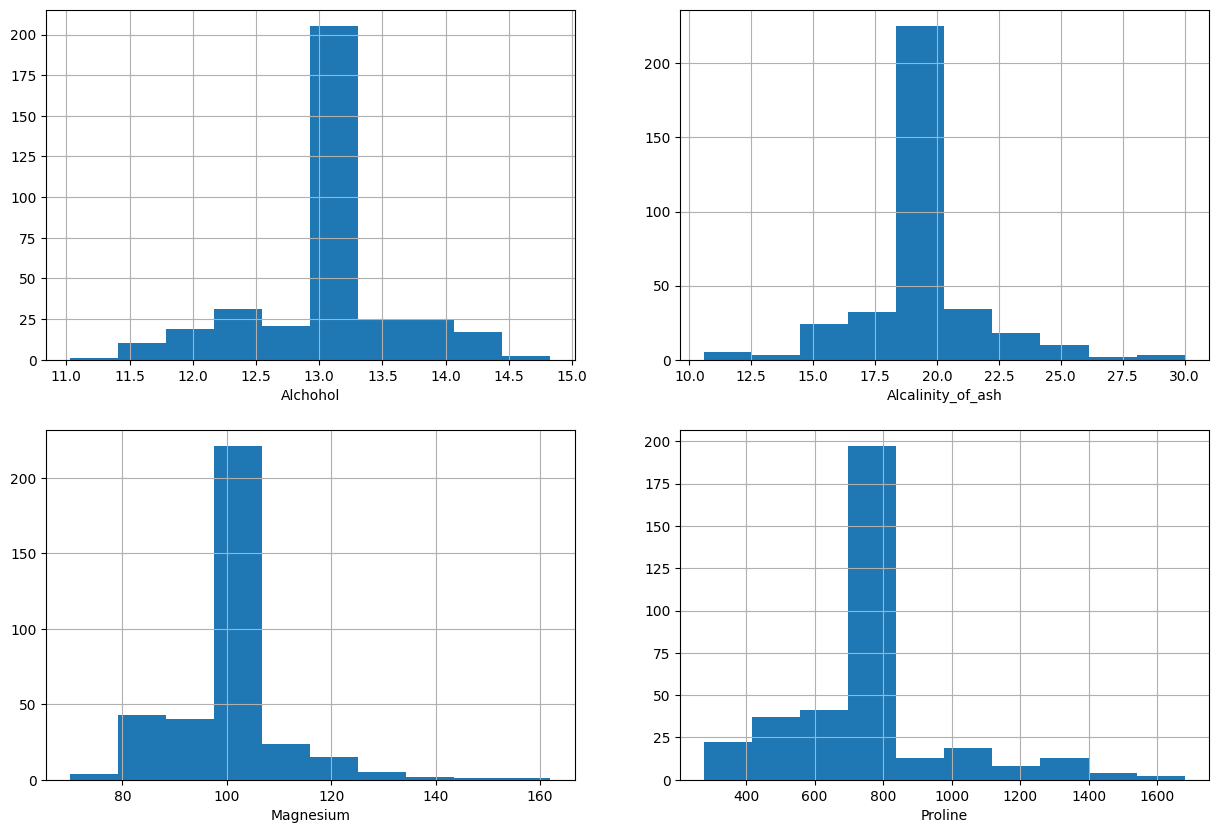

In [48]:
#Using plot histogram to check distribution
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = new_df2.Alcohol.hist(bins=10)
fig.set_xlabel('Alchohol')

plt.subplot(2, 2, 2)
fig = new_df2.Alcalinity_of_ash.hist(bins=10)
fig.set_xlabel('Alcalinity_of_ash')

plt.subplot(2, 2, 3)
fig = new_df2.Magnesium.hist(bins=10)
fig.set_xlabel('Magnesium')

plt.subplot(2, 2, 4)
fig = new_df2.Proline.hist(bins=10)
fig.set_xlabel('Proline')

It is noticable that the distributions of our given columns are skewed because of their visual distribution

In [49]:
new_df2.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.938202
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.938202
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.938202
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.938202
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.938202


# **Training a Regression Model**

In [183]:
X = new_df2.drop(['Alcohol'], axis=1)
y = new_df2['Alcohol']

In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [185]:
X_train.shape, X_test.shape

((284, 13), (72, 13))

In [130]:
X_train.dtypes

Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                       float64
Total_phenols                   float64
Flavonoids                      float64
Nonflavonoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                         float64
class                           float64
dtype: object

In [212]:
#Identifying columns that are not Object types
numerical = [col for col in X_train.columns if X_train[col].dtypes != '0']
numerical

['Malicacid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Total_phenols',
 'Flavonoids',
 'Nonflavonoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 '0D280_0D315_of_diluted_wines',
 'Proline',
 'class']

In [186]:
#Checking if there is a missing values in the columns
X_test[numerical].isnull().sum()

Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavonoids                      0
Nonflavonoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [67]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [187]:
X_train[numerical].columns

Index(['Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
       'Flavonoids', 'Nonflavonoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline',
       'class'],
      dtype='object')

In [171]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Malicacid'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
cols = X_train.columns

In [180]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# **Feature Scaling**

In [188]:
X_train.describe()

,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2.340674,2.368434,19.602049,99.395434,2.280021,2.015022,0.362969,1.573830,4.995383,0.961387,2.611969,746.281136,1.962059
std,0.804227,0.189974,2.298437,9.844853,0.444266,0.695684,0.086942,0.380138,1.576024,0.156817,0.484660,213.632274,0.538725
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.270000,290.000000,1.000000
25%,1.825000,2.360000,19.494944,97.750000,2.278834,2.029270,0.340000,1.540000,4.660000,0.957449,2.611685,674.250000,1.938202
50%,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
75%,2.336348,2.366517,19.525000,99.741573,2.301334,2.095000,0.361854,1.590899,5.058090,0.972500,2.780000,746.893258,2.000000
max,5.800000,3.220000,30.000000,162.000000,3.880000,3.750000,0.660000,3.280000,13.000000,1.710000,4.000000,1547.000000,3.000000


In [190]:
for new_df2 in [X_train, X_test]:
    new_df2[numerical] = new_df2[numerical].fillna(new_df2[numerical].median())

#Check for missing values in X_train after filling
print(X_train[numerical].isnull().sum())


Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavonoids                      0
Nonflavonoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64


In [191]:
new_df2.isnull().sum()

Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavonoids                      0
Nonflavonoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

# **Model Training**

In [195]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

# **Predict Results**

In [196]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([ 47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  21,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
        47,  47, 102,  47,  47,  47,  47,  47,  47,  47,  47,  81,  47,
        47,  47,  47,  24,  47,  47,  24,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47])

In [197]:
#Probability of getting output as 0
logreg.predict_proba(X_test)[:,0]

array([2.28377255e-03, 1.98028487e-04, 1.28994228e-04, 1.82656514e-02,
       2.02175830e-04, 5.50546146e-06, 2.02175830e-04, 3.13498196e-03,
       1.98028487e-04, 1.98028487e-04, 1.98028487e-04, 8.97569399e-03,
       2.61768036e-04, 5.35638127e-07, 2.05110443e-04, 1.92305748e-06,
       1.98028487e-04, 1.98028487e-04, 1.26790361e-05, 2.26658124e-02,
       1.80449077e-03, 7.25324961e-07, 2.02175830e-04, 2.05110443e-04,
       1.98028487e-04, 1.98028487e-04, 2.02175830e-04, 1.47908071e-05,
       4.74825137e-03, 2.05110443e-04, 9.48602969e-05, 1.98028487e-04,
       2.73042306e-03, 4.66224789e-06, 1.98028487e-04, 1.48389434e-04,
       2.05110443e-04, 2.05110443e-04, 1.98028487e-04, 2.81580997e-05,
       5.47840244e-08, 5.72526184e-06, 1.98028487e-04, 1.15645953e-03,
       1.98028487e-04, 2.02175830e-04, 2.18110449e-03, 2.02175830e-04,
       1.98028487e-04, 1.51704723e-06, 1.57036106e-09, 6.36402294e-06,
       1.98028487e-04, 2.02175830e-04, 1.98028487e-04, 1.28123315e-05,
      

In [198]:
#Probability of getting output as 1
logreg.predict_proba(X_test)[:,1]

array([1.32414544e-02, 7.01479355e-04, 8.79307075e-05, 1.53035916e-03,
       6.97512901e-04, 4.50720463e-04, 6.97512901e-04, 1.32841675e-02,
       7.01479355e-04, 7.01479355e-04, 7.01479355e-04, 1.01783102e-02,
       1.83517358e-02, 1.95838587e-06, 6.89201982e-04, 4.54240898e-06,
       7.01479355e-04, 7.01479355e-04, 1.65362326e-03, 2.68955061e-02,
       4.67454757e-04, 2.56693366e-06, 6.97512901e-04, 6.89201982e-04,
       7.01479355e-04, 7.01479355e-04, 6.97512901e-04, 1.69232522e-03,
       9.20496137e-03, 6.89201982e-04, 1.28637671e-03, 7.01479355e-04,
       1.89575811e-03, 4.54107928e-05, 7.01479355e-04, 1.49061652e-04,
       6.89201982e-04, 6.89201982e-04, 7.01479355e-04, 7.68147877e-04,
       3.59376699e-07, 1.10640318e-03, 7.01479355e-04, 4.91671046e-03,
       7.01479355e-04, 6.97512901e-04, 1.69963075e-03, 6.97512901e-04,
       7.01479355e-04, 1.87946047e-06, 1.83476929e-08, 3.78983979e-06,
       7.01479355e-04, 6.97512901e-04, 7.01479355e-04, 1.10098320e-04,
      

# **Check accurcy score**

In [200]:
from sklearn.metrics import mean_squared_error

#Assuming y_pred_test contains continuous predictions
mse = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error: {0:0.4f}'.format(mse))

Mean Squared Error: 1254.6434


In [201]:
y_pred1 = logreg.predict_proba(X_test)[:,1]

# **Conclusion**

logistic regression and linear regression are both fundamental techniques in machine learning, each suited for different types of tasks. Logistic regression is ideal for classification problems, providing probabilities or class predictions for categorical outcomes, while linear regression is well-suited for predicting continuous numeric values. Logistic regression models the probability of an event occurring based on input features, making it useful for binary classification tasks like spam detection or disease diagnosis. On the other hand, linear regression establishes a linear relationship between independent variables and the target variable, making it effective for predicting outcomes such as house prices or demand forecasting. Understanding the distinctions between these models is essential for selecting the most appropriate approach for your specific problem domain and ensuring accurate interpretation of results.